In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Enable inline plotting
%matplotlib inline

In [ ]:
#load the dataset
df = pd.read_csv("salary_prediction_dataset.csv")

df.head()

,YearsExperience,Salary
0,8.116262,41469.816295
1,19.063572,88641.137315
2,14.907885,76440.413727
3,12.374511,64925.484725
4,3.964354,22620.723082


YearsExperience    0
Salary             0
dtype: int64


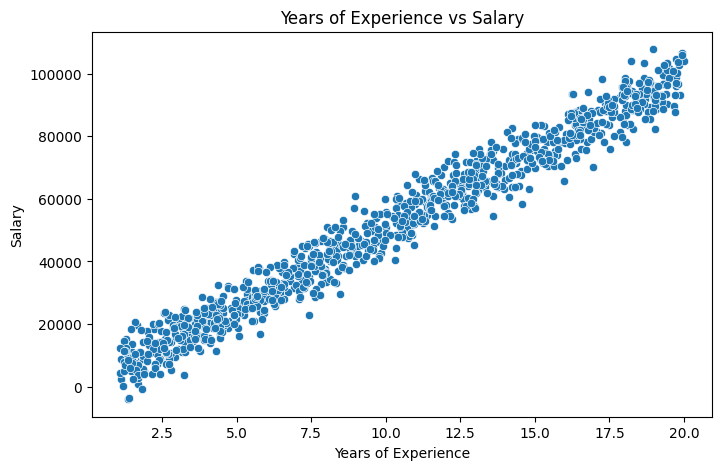

In [ ]:
#Checking for missing values
print(df.isnull().sum())

#plot data distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [ ]:
#splitting the dataset into features (x) and target variable(y)
X = df[['YearsExperience']]  #independent
Y = df[['Salary']]  #dependent

#Splitting into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Checking dataset split sizes

X_train.shape, X_test.shape

((800, 1), (200, 1))

In [ ]:
#creating and training the simple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

#Display model parameters
print(f"Intercept:, {model.intercept_}")
print(f"Coefficients:, {model.coef_[0]}")

Intercept:, [995.57704648]
Coefficients:, [4953.70941726]


In [ ]:
#predicting salary for test data
y_pred = model.predict(X_test)

#Creating a dataframe to compare actual vs predicted values
results = pd.DataFrame({'Actual': Y_test['Salary'], 'Predicted': y_pred.flatten()})
results.head()

,Actual,Predicted
521,46144.843128,41798.916309
737,85731.005173,82808.016799
740,55059.748116,49496.929481
660,42143.595304,39465.280850
411,88585.759395,95369.573814


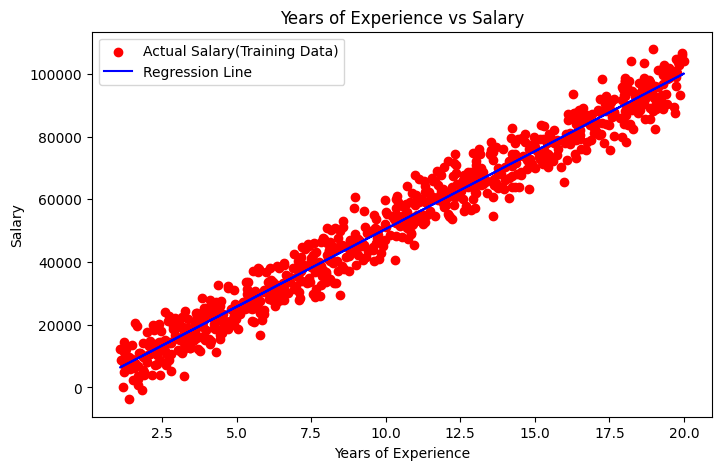

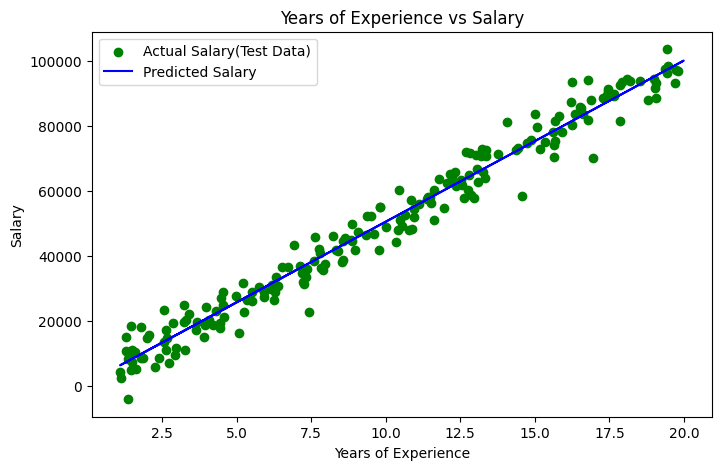

In [13]:
#plot traiming data with regression line
plt.figure(figsize=(8,5))
plt.scatter(X_train,Y_train,color='red', label='Actual Salary(Training Data)')
plt.plot(X_train,model.predict(X_train),color='blue', label='Regression Line')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

#plot test data predictions
plt.figure(figsize=(8,5))
plt.scatter(X_test,Y_test,color='green', label='Actual Salary(Test Data)')
plt.plot(X_train,model.predict(X_train),color='blue', label='Predicted Salary')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [14]:
#Model Evaluation
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 3602.3955438952066
Mean Squared Error: 21434311.66454385
R-squared: 0.9720753738957405


In [19]:
#Predict salary based on user input
experience = float(input("Enter the number of years of experience: "))
predicted_salary = model.predict([[experience]])[0]

# Access the first element of the NumPy array to get the predicted salary as a single value
predicted_salary = predicted_salary[0]

print(f"Predicted Salary for {experience} years of experience: {predicted_salary:.2f}")

Enter the number of years of experience: 2
Predicted Salary for 2.0 years of experience: 10903.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
